In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
def convert_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y %H:%M')
    except ValueError:
        return pd.to_datetime(date_str, format='%m/%d/%y %H:%M')
# Leer el archivo CSV y crear un DataFrame
df = pd.read_csv('data.csv')
print("DF ORIGINAL")
df.info()
selected_columns = ["Product", "Quantity Ordered", "Order Date"]
new_df = df[selected_columns]
# Usando dropna sin especificar subset para eliminar filas con valores nulos en todas las columnas
new_df = new_df.dropna(how='all')


DF ORIGINAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
print("DF NUEVO")
new_df.info()
new_df['Quantity Ordered'] = pd.to_numeric(new_df['Quantity Ordered'], errors='coerce')
new_df = new_df.dropna(how='all')
new_df.info()
#print(new_df.head(10))
num_rows_before = new_df.shape[0]
# Eliminar filas con datos faltantes
new_df.dropna(inplace=True)
# Obtener el número de filas después de la eliminación
print(new_df.head(10))
num_rows_after = new_df.shape[0]

# Calcular la cantidad de filas eliminadas
num_rows_deleted = num_rows_before - num_rows_after

print("Número de filas eliminadas:", num_rows_deleted)


# Convertir la columna 'Order Date' a formato de fecha

new_df['Order Date'] = new_df['Order Date'].apply(convert_date)



DF NUEVO
<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           186305 non-null  object
 1   Quantity Ordered  186305 non-null  object
 2   Order Date        186305 non-null  object
dtypes: object(3)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           186305 non-null  object 
 1   Quantity Ordered  185950 non-null  float64
 2   Order Date        186305 non-null  object 
dtypes: float64(1), object(2)
memory usage: 5.7+ MB
                      Product  Quantity Ordered        Order Date
0                      iPhone               1.0    01/22/19 21:25
1    Lightning Charging Cable               1.0    01/28/19 14:15
2     

In [ ]:
new_df['Year'] = new_df['Order Date'].dt.year

# Crear una columna para el mes
new_df['Month'] = new_df['Order Date'].dt.month

# Crear una columna para el día
new_df['Day'] = new_df['Order Date'].dt.day

# Crear una columna para la hora
new_df['Hour'] = new_df['Order Date'].dt.hour

# Crear una columna para el minuto
new_df['Minute'] = new_df['Order Date'].dt.minute
print("ULTIMO")
new_df.info()

ULTIMO
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185950 non-null  object        
 1   Quantity Ordered  185950 non-null  float64       
 2   Order Date        185950 non-null  datetime64[ns]
 3   Year              185950 non-null  int64         
 4   Month             185950 non-null  int64         
 5   Day               185950 non-null  int64         
 6   Hour              185950 non-null  int64         
 7   Minute            185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 12.8+ MB


In [ ]:
print(new_df.describe())
print(new_df.describe(include=['O']))

       Quantity Ordered           Year          Month            Day  \
count     185950.000000  185950.000000  185950.000000  185950.000000   
mean           1.124383    2019.000183       7.059140      15.759532   
std            0.442793       0.013521       3.502996       8.782176   
min            1.000000    2019.000000       1.000000       1.000000   
25%            1.000000    2019.000000       4.000000       8.000000   
50%            1.000000    2019.000000       7.000000      16.000000   
75%            1.000000    2019.000000      10.000000      23.000000   
max            9.000000    2020.000000      12.000000      31.000000   

                Hour         Minute    Day of Week  
count  185950.000000  185950.000000  185950.000000  
mean       14.413305      29.481361       2.991482  
std         5.423416      17.317573       2.001968  
min         0.000000       0.000000       0.000000  
25%        11.000000      14.000000       1.000000  
50%        15.000000      29.0000

In [ ]:
unique_products = new_df['Product'].unique()
print(unique_products)

['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine']


In [ ]:
# Supongamos que seleccionamos el año y mes deseados
year_selected = 2019
month_selected = 1
N = 5  # Puedes cambiar este valor a la cantidad de productos que desees obtener

# Filtrar los datos para el año y mes seleccionados
filtered_data = new_df[(new_df['Year'] == year_selected) & (new_df['Month'] == month_selected)]

# Agrupar los datos filtrados por producto y sumar las cantidades vendidas
product_sales_selected = filtered_data.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Ordenar los productos por la cantidad total vendida (de mayor a menor) para el año y mes seleccionados
most_sold_products_selected = product_sales_selected.sort_values(by='Quantity Ordered', ascending=False).head(N)

print(f"Para el año {year_selected} y el mes {month_selected}:")
print(f"Los {N} productos más vendidos son:")
for index, row in most_sold_products_selected.iterrows():
    print("Producto:", row['Product'])
    print("Cantidad vendida:", row['Quantity Ordered'])
    print("---")

Para el año 2019 y el mes 1:
Los 5 productos más vendidos son:
Producto: AAA Batteries (4-pack)
Cantidad vendida: 1595.0
---
Producto: AA Batteries (4-pack)
Cantidad vendida: 1424.0
---
Producto: USB-C Charging Cable
Cantidad vendida: 1283.0
---
Producto: Lightning Charging Cable
Cantidad vendida: 1149.0
---
Producto: Wired Headphones
Cantidad vendida: 1081.0
---


In [ ]:
N = 5  # Puedes cambiar este valor a la cantidad de productos que desees obtener

# Agrupar los datos de todo el DataFrame por producto y sumar las cantidades vendidas
product_sales_total = new_df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Ordenar los productos por la cantidad total vendida (de mayor a menor) en todo el DataFrame
most_sold_products_total = product_sales_total.sort_values(by='Quantity Ordered', ascending=False).head(N)

print("\nEn todo el DataFrame:")
print(f"Los {N} productos más vendidos son:")
for index, row in most_sold_products_total.iterrows():
    print("Producto:", row['Product'])
    print("Cantidad vendida:", row['Quantity Ordered'])
    print("---")


En todo el DataFrame:
Los 5 productos más vendidos son:
Producto: AAA Batteries (4-pack)
Cantidad vendida: 31017.0
---
Producto: AA Batteries (4-pack)
Cantidad vendida: 27635.0
---
Producto: USB-C Charging Cable
Cantidad vendida: 23975.0
---
Producto: Lightning Charging Cable
Cantidad vendida: 23217.0
---
Producto: Wired Headphones
Cantidad vendida: 20557.0
---


In [ ]:
N = 5  # Puedes cambiar este valor a la cantidad de productos que desees obtener

# Supongamos que deseamos encontrar el producto más vendido dentro de un rango de fechas específico
start_date = '2019-01-01'
end_date = '2019-02-25'

# Convierte las fechas a objetos datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filtra los datos dentro del rango de fechas
filtered_data = new_df[(new_df['Order Date'] >= start_date) & (new_df['Order Date'] <= end_date)]

# Agrupa los datos filtrados por producto y sumar las cantidades vendidas
product_sales_range = filtered_data.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Ordena los productos por la cantidad total vendida (de mayor a menor) dentro del rango de fechas
most_sold_products_range = product_sales_range.sort_values(by='Quantity Ordered', ascending=False).head(N)

print(f"Para el rango de fechas desde {start_date} hasta {end_date}:")
print(f"Los {N} productos más vendidos son:")
for index, row in most_sold_products_range.iterrows():
    print("Producto:", row['Product'])
    print("Cantidad vendida:", row['Quantity Ordered'])
    print("---")

Para el rango de fechas desde 2019-01-01 00:00:00 hasta 2019-02-25 00:00:00:
Los 5 productos más vendidos son:
Producto: AAA Batteries (4-pack)
Cantidad vendida: 3332.0
---
Producto: AA Batteries (4-pack)
Cantidad vendida: 2891.0
---
Producto: USB-C Charging Cable
Cantidad vendida: 2676.0
---
Producto: Lightning Charging Cable
Cantidad vendida: 2445.0
---
Producto: Wired Headphones
Cantidad vendida: 2162.0
---


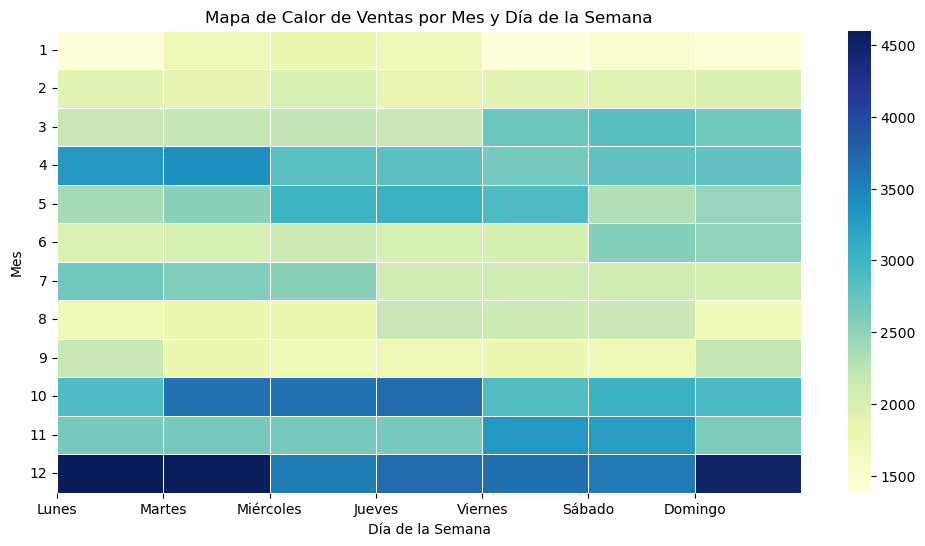

In [ ]:
# SalesHeatmap: Muestra el mapa de calor de ventas por mes y día de la semana.

# Extraer el mes y el día de la semana de la columna 'Order Date'
new_df['Month'] = new_df['Order Date'].dt.month
new_df['Day of Week'] = new_df['Order Date'].dt.dayofweek  # 0: Lunes, 1: Martes, ..., 6: Domingo

# Crear una tabla pivote para la cantidad vendida por mes y día de la semana
heatmap_data = new_df.pivot_table(index='Month', columns='Day of Week', values='Quantity Ordered', aggfunc='sum')

# Crear un mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5)
plt.title('Mapa de Calor de Ventas por Mes y Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Mes')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.yticks(rotation=0)
plt.show()

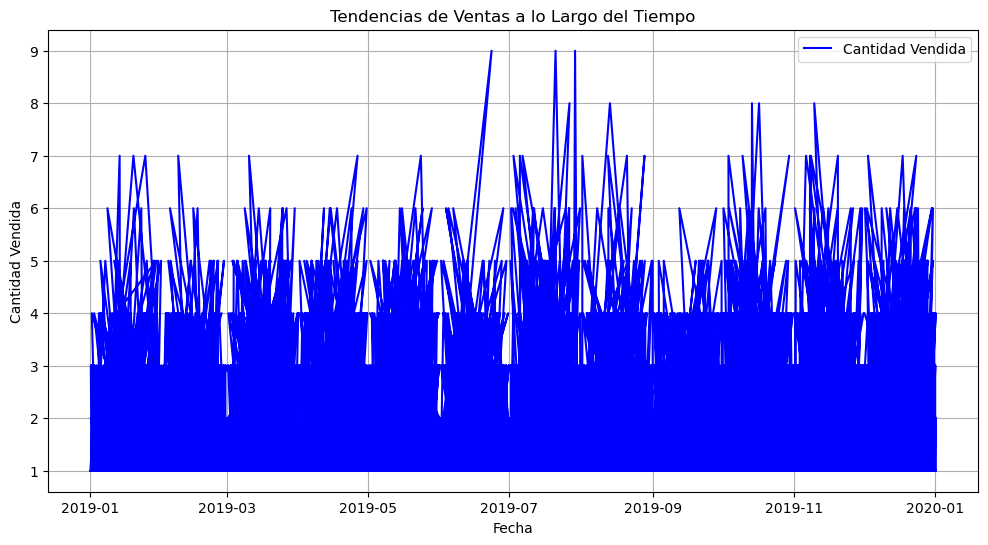

In [ ]:
import matplotlib.pyplot as plt
# SalesTrends : Muestra las tendencias de ventas a lo largo del tiempo en un gráfico de líneas o serie temporal.
# Supongamos que tienes un DataFrame llamado 'new_df' con las columnas 'Order Date' y 'Quantity Ordered'

# Preparación de los datos
new_df['Order Date'] = pd.to_datetime(new_df['Order Date'])  # Asegúrate de que la columna 'Order Date' sea de tipo datetime

# Gráfico de línea para mostrar las tendencias de ventas a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(new_df['Order Date'], new_df['Quantity Ordered'], color='blue', label='Cantidad Vendida')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.title('Tendencias de Ventas a lo Largo del Tiempo')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

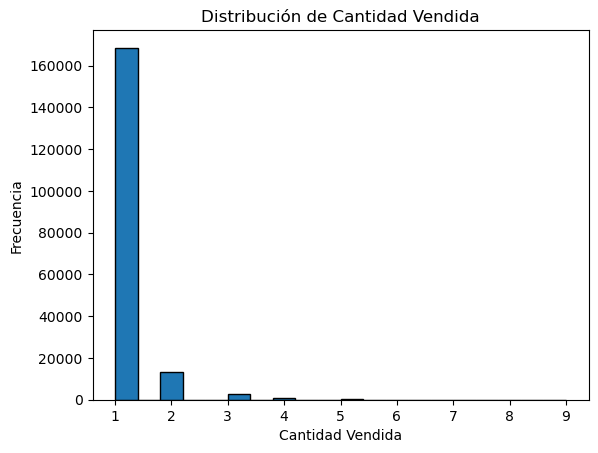

In [ ]:
import matplotlib.pyplot as plt

# Ejemplo de histograma para la cantidad de productos vendidos
plt.hist(new_df['Quantity Ordered'], bins=20, edgecolor='k')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cantidad Vendida')
plt.show()

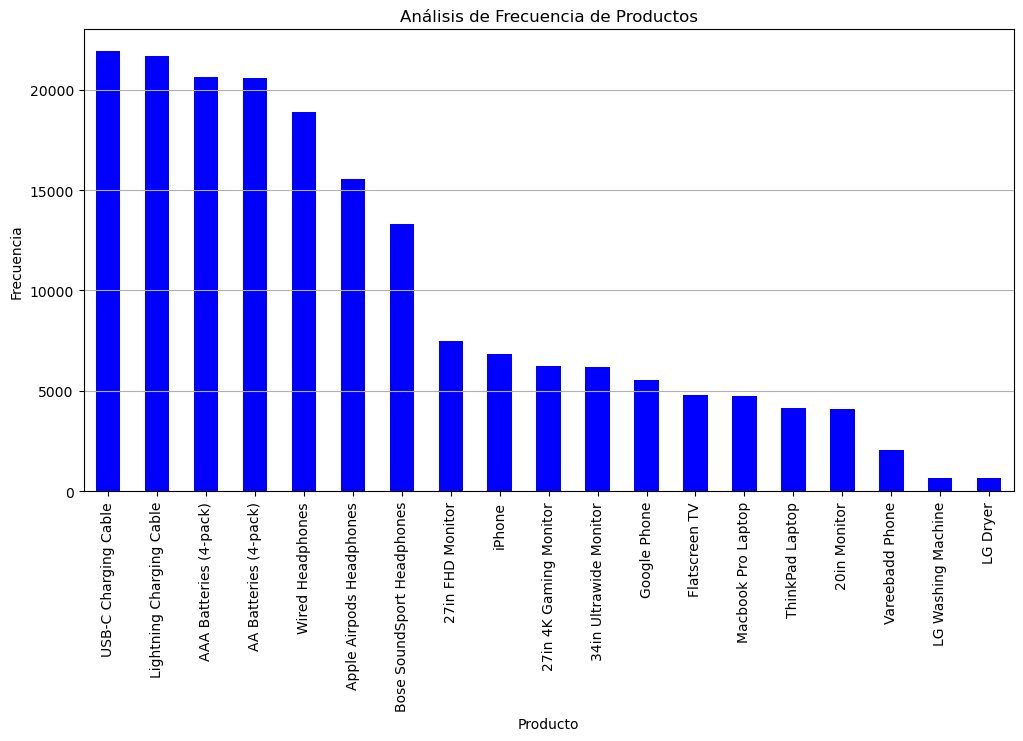

In [ ]:

#ProductFrequency: Muestra el análisis de frecuencia de productos en forma de un gráfico de barras.

# Calcular la frecuencia de productos
product_frequency = new_df['Product'].value_counts()

# Crear un gráfico de barras para mostrar la frecuencia de productos
plt.figure(figsize=(12, 6))
product_frequency.plot(kind='bar', color='blue')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.title('Análisis de Frecuencia de Productos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mayor legibilidad

# Mostrar el gráfico de barras
plt.grid(axis='y')
plt.show()

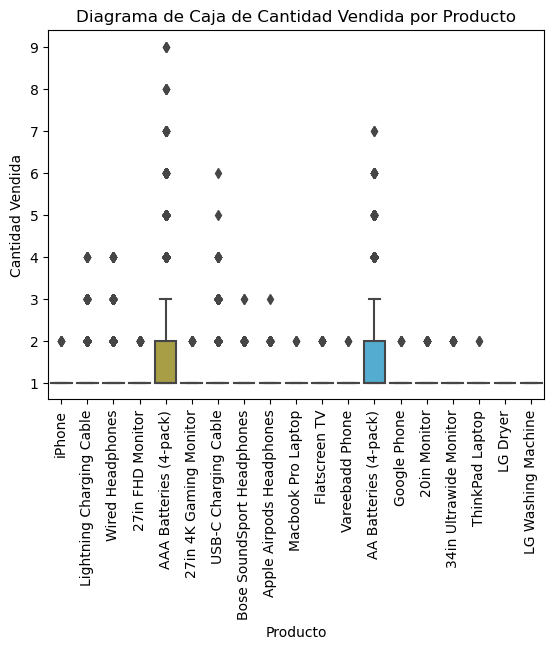

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Ejemplo de diagrama de caja para la cantidad vendida
sns.boxplot(x='Product', y='Quantity Ordered', data=new_df)
plt.xticks(rotation=90)
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Diagrama de Caja de Cantidad Vendida por Producto')
plt.show()

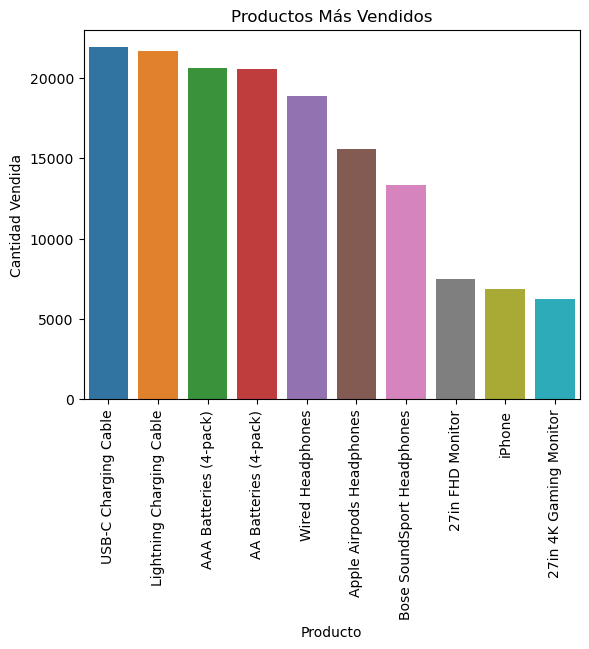

In [ ]:
# Ejemplo de gráfico de barras para mostrar los productos más vendidos
top_products = new_df['Product'].value_counts().head(10)
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=90)
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Productos Más Vendidos')
plt.show()

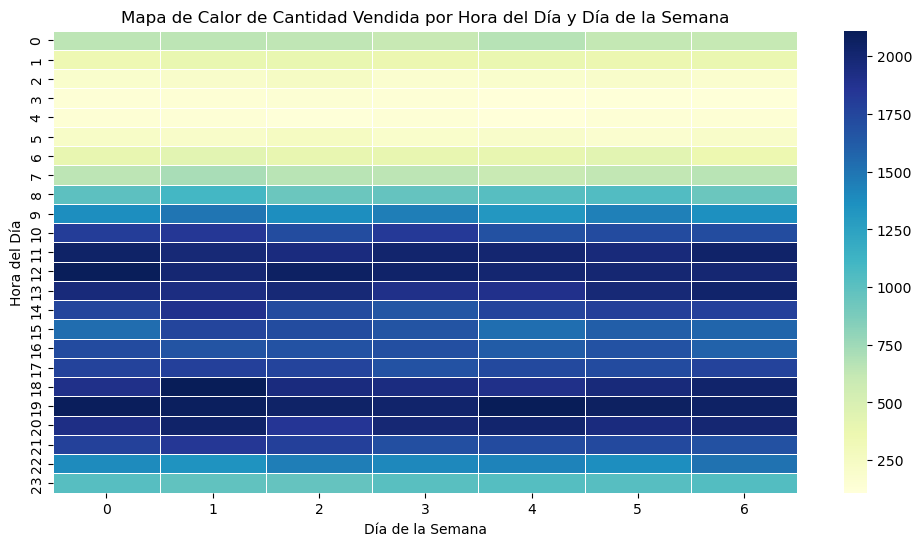

In [ ]:
# Supongamos que tienes un DataFrame llamado 'data' con las columnas 'Order Date' y 'Quantity Ordered'

# Extraer la hora del día y el día de la semana de la columna 'Order Date'
new_df['Hour'] = new_df['Order Date'].dt.hour
new_df['Day of Week'] = new_df['Order Date'].dt.dayofweek  # 0: Lunes, 1: Martes, ..., 6: Domingo

# Crear una tabla pivote para la cantidad vendida por hora y día de la semana
heatmap_data =new_df.pivot_table(index='Hour', columns='Day of Week', values='Quantity Ordered', aggfunc='sum')

# Crear un mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5)
plt.title('Mapa de Calor de Cantidad Vendida por Hora del Día y Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Hora del Día')
plt.show()

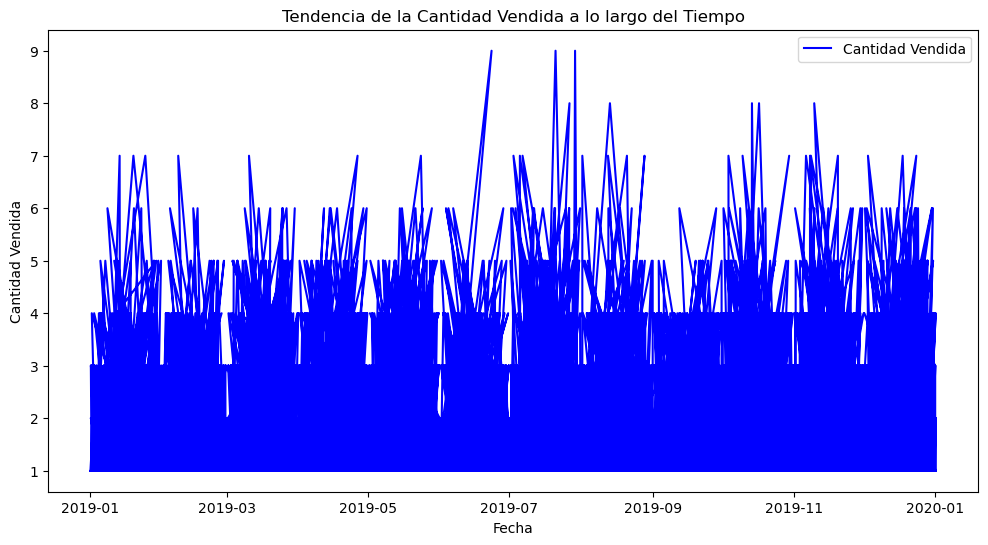

In [ ]:

plt.figure(figsize=(12, 6))

# Gráfico de línea para la cantidad vendida a lo largo del tiempo
plt.plot(new_df['Order Date'], new_df['Quantity Ordered'], color='blue', label='Cantidad Vendida')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.title('Tendencia de la Cantidad Vendida a lo largo del Tiempo')
plt.legend()

# Mostrar la figura
plt.show()

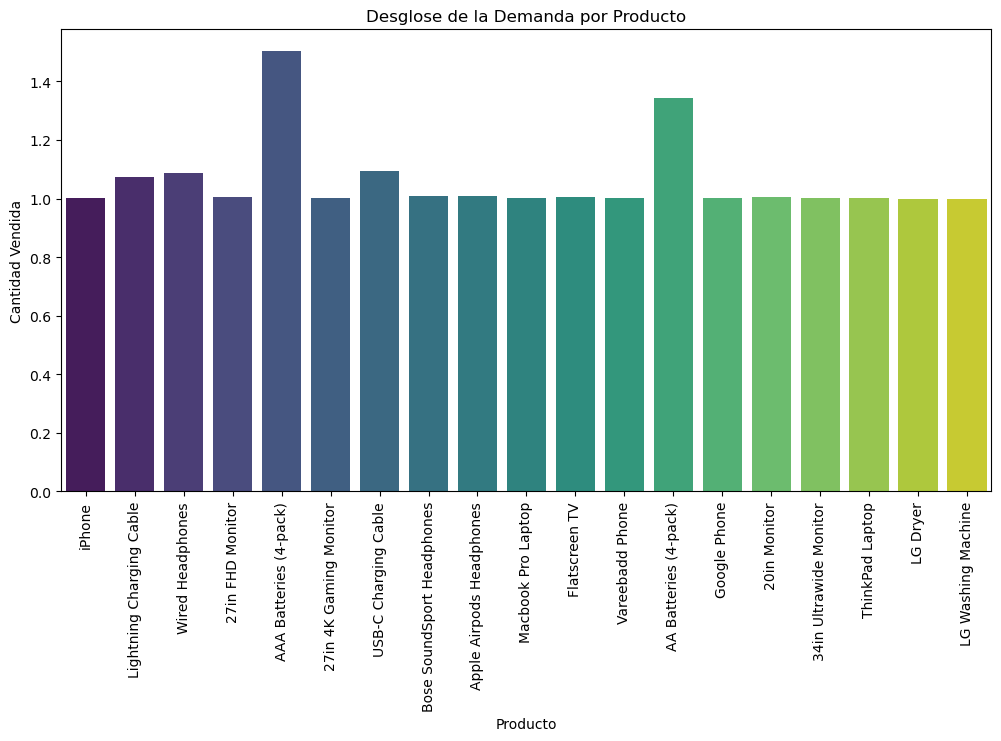

In [ ]:
# Supongamos que tienes un DataFrame llamado 'new_df' con las columnas 'Product' y 'Quantity Ordered'

# Desglose de la demanda por producto
plt.figure(figsize=(12, 6))

# Utiliza seaborn para crear un gráfico de barras
sns.barplot(x='Product', y='Quantity Ordered', data=new_df, ci=None, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Desglose de la Demanda por Producto')

# Mostrar el gráfico
plt.show()

C:\Users\misae\AppData\Local\Temp\ipykernel_25184\3422614573.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historial_ventas_producto['Order Date'] = pd.to_datetime(historial_ventas_producto['Order Date'])
C:\Users\misae\anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

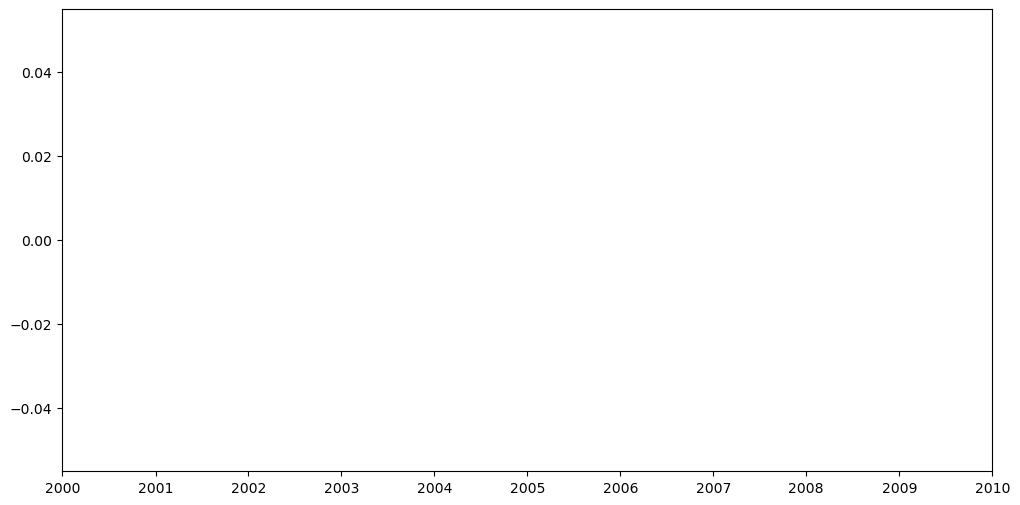

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'new_df' con las columnas 'Product', 'Order Date' y 'Quantity Ordered'

# Selecciona un producto específico para el historial de ventas
producto_seleccionado = 'iPhone'  # Reemplaza con el nombre del producto que deseas analizar

# Filtra los datos para el producto seleccionado
historial_ventas_producto = new_df[new_df['Product'] == producto_seleccionado]

# Preparación de los datos
historial_ventas_producto['Order Date'] = pd.to_datetime(historial_ventas_producto['Order Date'])
historial_ventas_producto = historial_ventas_producto.set_index('Order Date')

# Gráfico de línea para mostrar el historial de ventas
plt.figure(figsize=(12, 6))
sns.lineplot(x=historial_ventas_producto.index, y=historial_ventas_producto['Quantity Ordered'], label='Cantidad Vendida', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.title(f'Historial de Ventas de "{producto_seleccionado}"')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [ ]:

# Agrupar los datos por producto y día para obtener la cantidad total vendida por día
daily_sales = new_df.groupby(['Product', pd.Grouper(key='Order Date', freq='D')])['Quantity Ordered'].sum().reset_index()

# Crea características adicionales a partir de la fecha
daily_sales['DayOfWeek'] = daily_sales['Order Date'].dt.dayofweek
daily_sales['Month'] = daily_sales['Order Date'].dt.month


# Preparación de secuencias
sequence_length = 7  # Longitud de la secuencia de tiempo
num_features = len(daily_sales['Product'].unique())

# Transforma los datos en secuencias de tiempo
X = []
y = []
for product in daily_sales['Product'].unique():
    product_data = daily_sales[daily_sales['Product'] == product]['Quantity Ordered'].values
    for i in range(len(product_data) - sequence_length):
        X.append(product_data[i:i+sequence_length])
        y.append(product_data[i+sequence_length])

X = np.array(X)
y = np.array(y)

# División de datos en conjuntos de entrenamiento y prueba
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape de los datos para que sean compatibles con la entrada de la red LSTM
X_train = X_train.reshape(-1, sequence_length, 1)
X_test = X_test.reshape(-1, sequence_length, 1)

# Construcción del modelo
model = keras.Sequential([
    layers.LSTM(64, input_shape=(sequence_length, 1)),
    layers.Dense(1)
])

# Compilación y entrenamiento del modelo
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predicciones
predictions = model.predict(X_test)

# Evaluación del modelo
mse = np.mean((predictions - y_test)**2)
print("Error cuadrático medio:", mse)

Epoch 1/50
168/168 [==============================] - 5s 9ms/step - loss: 1190.5243 - val_loss: 1035.8972
Epoch 2/50
168/168 [==============================] - 1s 5ms/step - loss: 736.7321 - val_loss: 686.5577
Epoch 3/50
168/168 [==============================] - 1s 5ms/step - loss: 534.3382 - val_loss: 473.0592
Epoch 4/50
168/168 [==============================] - 1s 5ms/step - loss: 402.7835 - val_loss: 336.1642
Epoch 5/50
168/168 [==============================] - 1s 5ms/step - loss: 313.1039 - val_loss: 246.9010
Epoch 6/50
168/168 [==============================] - 1s 5ms/step - loss: 250.4184 - val_loss: 190.5989
Epoch 7/50
168/168 [==============================] - 1s 6ms/step - loss: 205.9075 - val_loss: 153.4967
Epoch 8/50
168/168 [==============================] - 1s 6ms/step - loss: 174.8167 - val_loss: 128.5915
Epoch 9/50
168/168 [==============================] - 1s 6ms/step - loss: 152.0081 - val_loss: 113.7484
Epoch 10/50
168/168 [==============================] - 1s 6ms/